In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
bathy = xr.open_dataset('~/MEOPAR/grid/bathymetry_201702.nc')

In [4]:
    data = pd.read_csv(
        '/data/dlatorne/MIDOSS/random-oil-spills/10000_random_spills_2_step_bbox.csv', 
        parse_dates=[0],
                   )
data[0:2]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template
0,2017-01-15 16:00:00,7,-123.299802,49.274582,217,538,barge,316005498,21300.0,fuel,Lagrangian_diesel.dat
1,2016-09-26 23:00:00,7,-122.872365,48.575764,264,566,other,538070502,1800.0,fuel,Lagrangian_diesel.dat


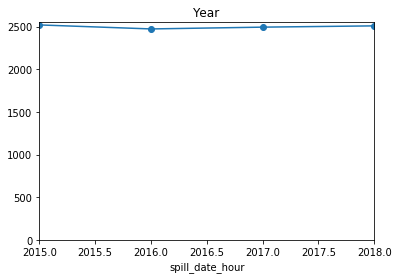

In [7]:
fig, ax = plt.subplots(1, 1)
data['spill_date_hour'].groupby(data.spill_date_hour.dt.year).agg('count').plot(style='o-', ax=ax);
ax.set_ylim(0, 2550);
ax.set_title('Year');

Text(0.5, 0, 'Month')

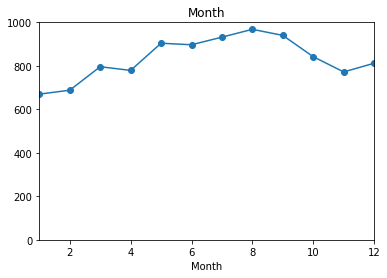

In [9]:
fig, ax = plt.subplots(1, 1)
data['spill_date_hour'].groupby(data.spill_date_hour.dt.month).agg('count').plot(style='o-', ax=ax);
ax.set_ylim(0, 1000);
ax.set_title('Month');
ax.set_xlabel("Month")

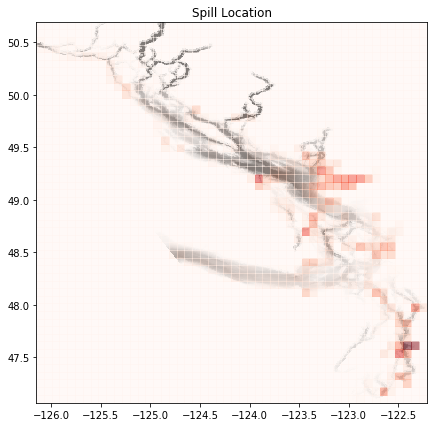

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap='Greys')
ax.hist2d(data.spill_lon, data.spill_lat, alpha=0.5, cmap='Reds', bins=50);
ax.set_title('Spill Location');

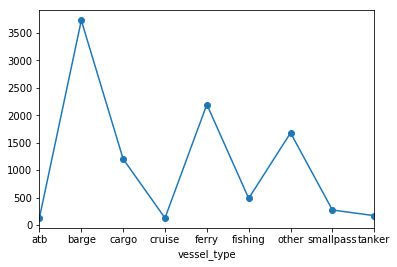

In [14]:
fig, ax = plt.subplots(1, 1)
data['vessel_type'].groupby(data.vessel_type).agg('count').plot(style='o-', ax=ax);

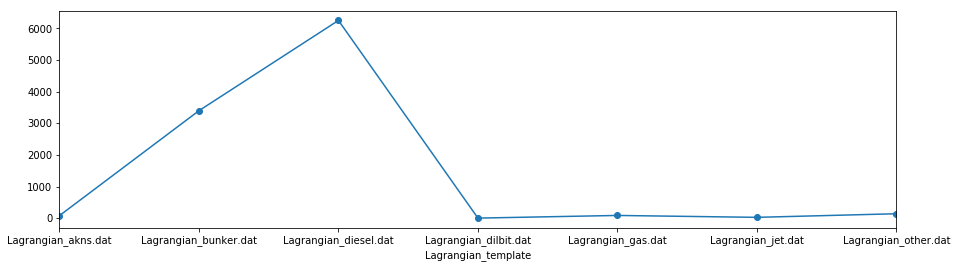

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
data['Lagrangian_template'].groupby(data.Lagrangian_template).agg('count').plot(style='o-', ax=ax);

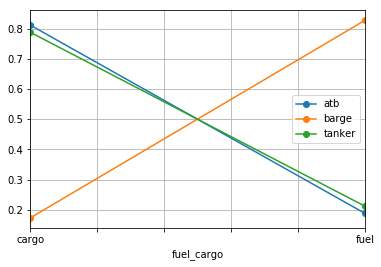

In [15]:
fig, ax = plt.subplots(1, 1)
for vessel in ['atb', 'barge', 'tanker']:
    total = (data[data.vessel_type == vessel].fuel_cargo.count())
    (data['fuel_cargo'].groupby(data.fuel_cargo[data.vessel_type == 
                                          vessel]).agg('count')/total).plot(
        style='o-', ax=ax, label=vessel);
ax.grid();
ax.legend();

Looks fixed.

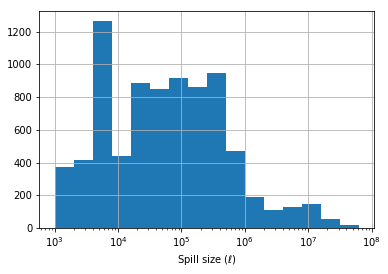

In [16]:
fig, ax = plt.subplots(1, 1)
logbins = 10**np.arange(3, 8, 0.3)
data['spill_volume'].hist(ax=ax,bins=logbins);
ax.set_xscale('log');
ax.set_xlabel('Spill size ($\ell$)');

In [19]:
data[data.spill_volume > 1e8]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template
1645,2018-12-30 18:00:00,7,-123.779762,48.237259,287,506,tanker,338500000,116831610.0,cargo,Lagrangian_akns.dat
2804,2017-05-10 17:00:00,7,-123.335526,49.234234,220,535,tanker,370361000,102230910.0,cargo,Lagrangian_gas.dat
4770,2016-08-21 06:00:00,7,-122.565529,48.519946,268,587,tanker,367067110,120540550.0,cargo,Lagrangian_akns.dat
6462,2018-02-16 03:00:00,7,-122.727244,48.659650,258,576,tanker,303031000,101995850.0,cargo,Lagrangian_diesel.dat
7290,2015-05-22 04:00:00,7,-122.688293,48.511612,268,579,tanker,308664000,117376230.0,cargo,Lagrangian_diesel.dat
9196,2016-03-24 04:00:00,7,-123.308258,49.223588,221,537,tanker,357628000,102230910.0,cargo,Lagrangian_akns.dat


In [20]:
data[data.Lagrangian_template != data.Lagrangian_template]

,spill_date_hour,run_days,spill_lon,spill_lat,geotiff_x_index,geotiff_y_index,vessel_type,vessel_mmsi,spill_volume,fuel_cargo,Lagrangian_template


In [21]:
logbins = 10**np.arange(0, 5, 0.3)
bincenter = 10**np.arange(0.3, 5, 0.3)
counts, bins = np.histogram(data.spill_volume/1000., bins=logbins)

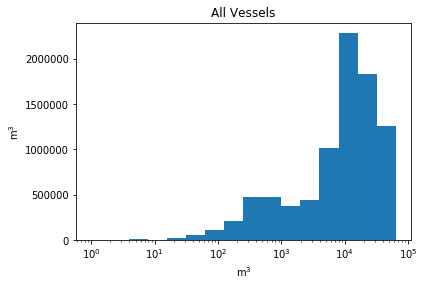

In [22]:
fig, ax = plt.subplots(1, 1)
ax.hist(bins[:-1], bins, weights=counts*bincenter);
ax.set_xlabel('m$^3$')
ax.set_ylabel('m$^3$');
ax.set_title('All Vessels')
ax.set_xscale('log');

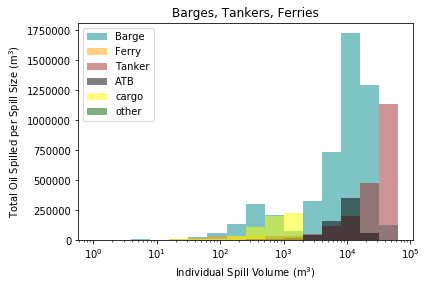

In [23]:
barge_counts, barge_bins = np.histogram(data[data.vessel_type == 'barge'].spill_volume/1000., 
                                        bins=logbins)
tanker_counts, tanker_bins = np.histogram(data[data.vessel_type == 'tanker'].spill_volume/1000., 
                                        bins=logbins)
ferry_counts, ferry_bins = np.histogram(data[data.vessel_type == 'ferry'].spill_volume/1000., 
                                        bins=logbins)
atb_counts, atb_bins = np.histogram(data[data.vessel_type == 'atb'].spill_volume/1000., 
                                        bins=logbins)
cargo_counts, cargo_bins = np.histogram(data[data.vessel_type == 'cargo'].spill_volume/1000., 
                                        bins=logbins)
other_counts, other_bins = np.histogram(data[data.vessel_type == 'other'].spill_volume/1000., 
                                        bins=logbins)
fig, ax = plt.subplots(1, 1)
ax.hist(logbins[:-1], logbins, weights=barge_counts*bincenter, color='darkcyan', alpha=0.5,
       label='Barge');
ax.hist(logbins[:-1], logbins, weights=ferry_counts*bincenter, color='orange', alpha=0.5,
       label='Ferry');
ax.hist(logbins[:-1], logbins, weights=tanker_counts*bincenter, color='brown', alpha=0.5,
       label='Tanker');
ax.hist(logbins[:-1], logbins, weights=atb_counts*bincenter, color='black', alpha=0.5,
       label='ATB');
ax.hist(logbins[:-1], logbins, weights=cargo_counts*bincenter, color='yellow', alpha=0.5,
       label='cargo');
ax.hist(logbins[:-1], logbins, weights=other_counts*bincenter, color='darkgreen', alpha=0.5,
       label='other');
ax.set_xlabel('Individual Spill Volume (m$^3$)')
ax.set_ylabel('Total Oil Spilled per Spill Size (m$^3$)');
ax.legend()
ax.set_xscale('log')
ax.set_title('Barges, Tankers, Ferries');

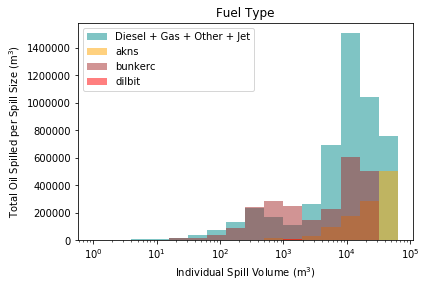

In [42]:
diesel_counts, diesel_bins = np.histogram(pd.concat([data[data.Lagrangian_template == 'Lagrangian_diesel.dat'],
                                            data[data.Lagrangian_template == 'Lagrangian_gas.dat'],
                                             data[data.Lagrangian_template == 'Lagrangian_other.dat'],
                                                    data[data.Lagrangian_template == "Lagrangian_jet.dat"]]).spill_volume/1000., 
                                        bins=logbins)
akns_counts, akns_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_akns.dat'].spill_volume/1000., 
                                        bins=logbins)
bunkerc_counts, bunkerc_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_bunker.dat'].spill_volume/1000., 
                                        bins=logbins)
dilbit_counts, dilbit_bins = np.histogram(data[data.Lagrangian_template == 'Lagrangian_dilbit.dat'].spill_volume/1000., 
                                        bins=logbins)
fig, ax = plt.subplots(1, 1)
ax.hist(logbins[:-1], logbins, weights=diesel_counts*bincenter, color='darkcyan', alpha=0.5,
       label='Diesel + Gas + Other + Jet');
ax.hist(logbins[:-1], logbins, weights=akns_counts*bincenter, color='orange', alpha=0.5,
       label='akns');
ax.hist(logbins[:-1], logbins, weights=bunkerc_counts*bincenter, color='brown', alpha=0.5,
       label='bunkerc');
ax.hist(logbins[:-1], logbins, weights=dilbit_counts*bincenter, color='red', alpha=0.5,
       label='dilbit');
ax.set_xlabel('Individual Spill Volume (m$^3$)')
ax.set_ylabel('Total Oil Spilled per Spill Size (m$^3$)');
ax.legend()
ax.set_xscale('log')
ax.set_title('Fuel Type');